In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print('Number of images in the training dataset:', train_images.shape[0])
print('Number of images in the testing dataset:', test_images.shape[0])
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Shape of the images in the training dataset: (28, 28)


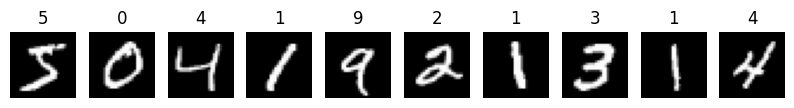

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [6]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images, 
    train_labels, 
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8772 - loss: 0.4132
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9690 - loss: 0.1018
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0627
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0480
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0372


In [8]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


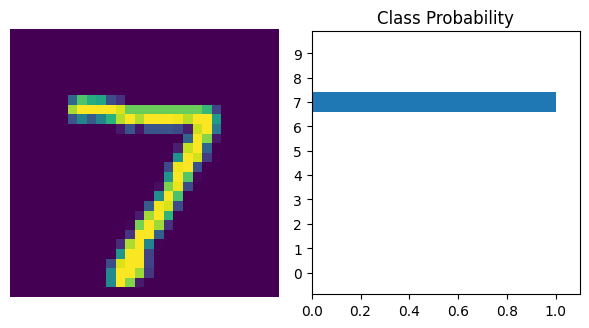

In [9]:
image, label = test_images[0], test_labels[0]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
view_classify(image,  probabilities[0])

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0917
Accuracy of the neural network on the 10000 test images: 97.69%
